In this Notebook we want to evaluate three classification techniques of Random Forest, Support Vector Machine, and Naive Bayes on prediction of diabetes. 

Data consists of of 8 features including Pregnancies, Glucose, Blood Pressure,Skin Thickness, Insulin,	BMI,	Diabetes Pedigree Function, and	Age. The output is binary, 0 for negative result and 1 for diagnosis of diabetes.





In [ ]:
# Imports
import pandas as pd
import seaborn as sns
sns.set() # Set figure style
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "serif"
from tabulate import tabulate
import numpy as np


In [ ]:
# Read input
df = pd.read_csv('diabetes.csv')

# Illustrating the five first rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Gives information about the dataframe such as type of the variables, column names, null value counts, memory usage
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Basic stats about the data
# .T at the end is for Transposing the matrix
# By default categorical values are neglected unless include = "all" is added
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Cleaning Data

In this section we will clean the data and visualize it so that we have a better understanding of data.

First we have to find the un acceotable values in our data. Feature 2 to 6 can not have a value of zero. We replace these cells with mean of the column.

In [ ]:
# Since 0 value for Glucose, BloodPressure, SkinThickness, Insulin, and BMI	is not acceptable it shows that the values are missing. In order to count them we replace them with np.Nan
df_cleaned = df.copy(deep = True)
df_cleaned[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_cleaned[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_cleaned.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Replacing Nans with mean of each column
df_cleaned['Glucose'].fillna(df_cleaned['Glucose'].mean(), inplace = True)
df_cleaned['BloodPressure'].fillna(df_cleaned['BloodPressure'].mean(), inplace = True)
df_cleaned['SkinThickness'].fillna(df_cleaned['SkinThickness'].median(), inplace = True)
df_cleaned['Insulin'].fillna(df_cleaned['Insulin'].median(), inplace = True)
df_cleaned['BMI'].fillna(df_cleaned['BMI'].median(), inplace = True)

Now we can plot the histogram of the each parameter before and after cleaning the data

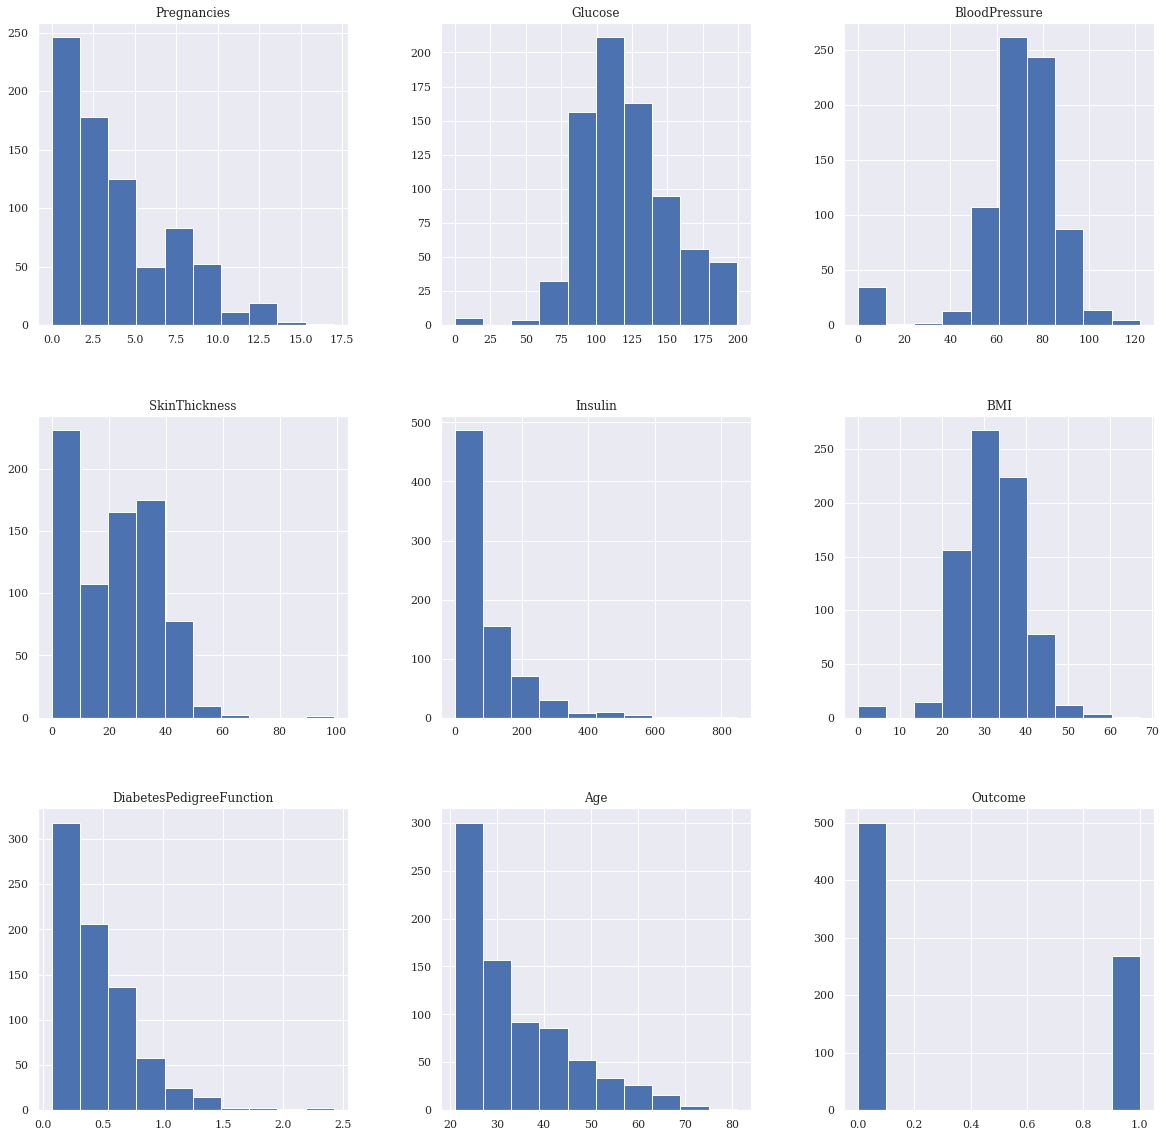

In [ ]:
# Parameter Histogram before cleaning
p = df.hist(figsize = (20,20))

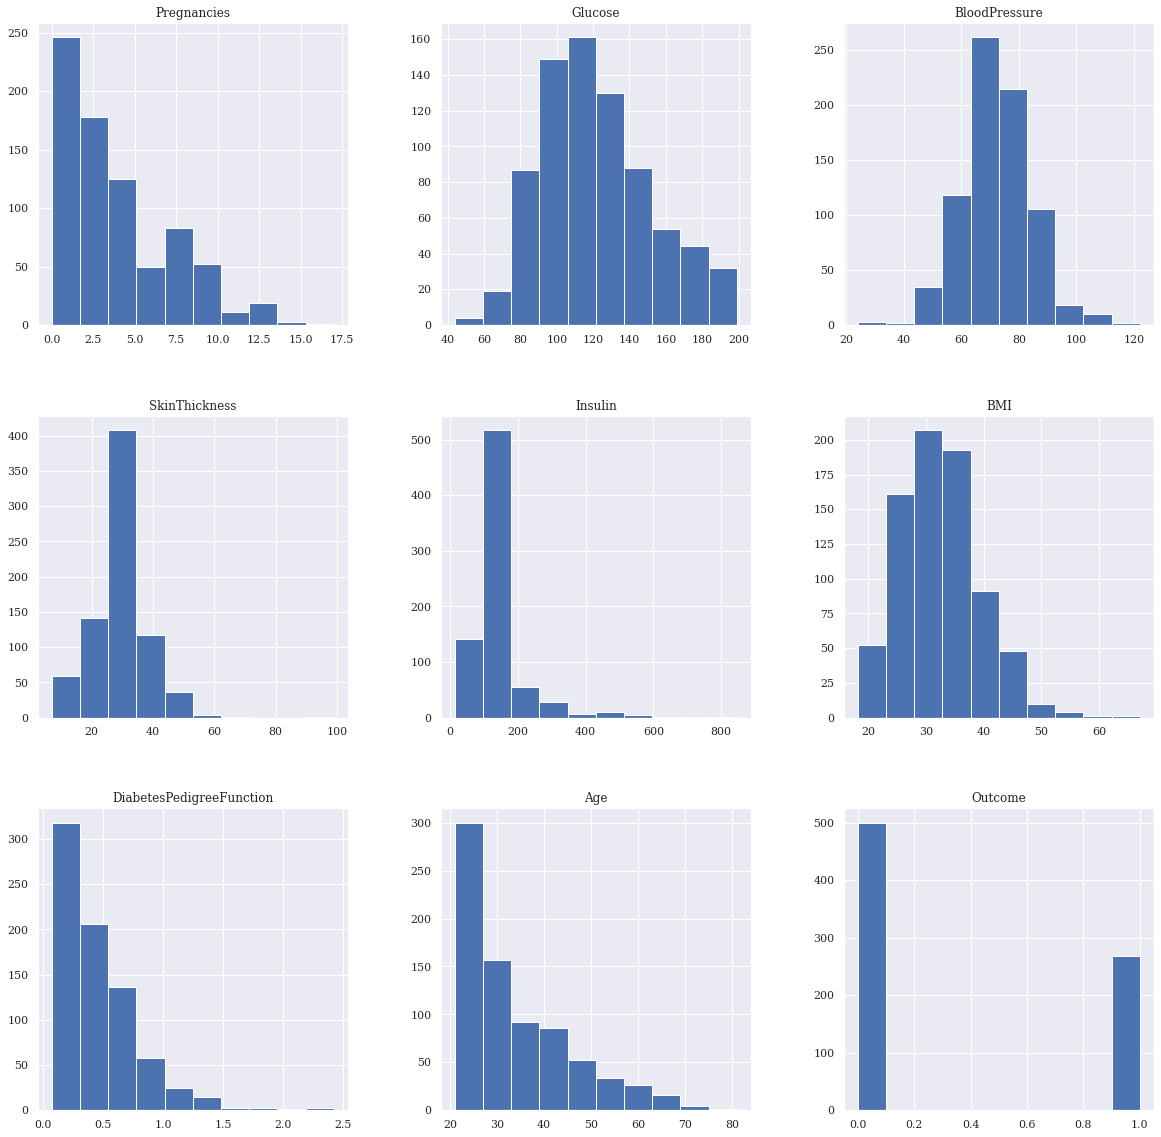

In [ ]:
# Parameter Histogram after cleaning
p = df_cleaned.hist(figsize = (20,20))

As we can See we have an imbalanced data.

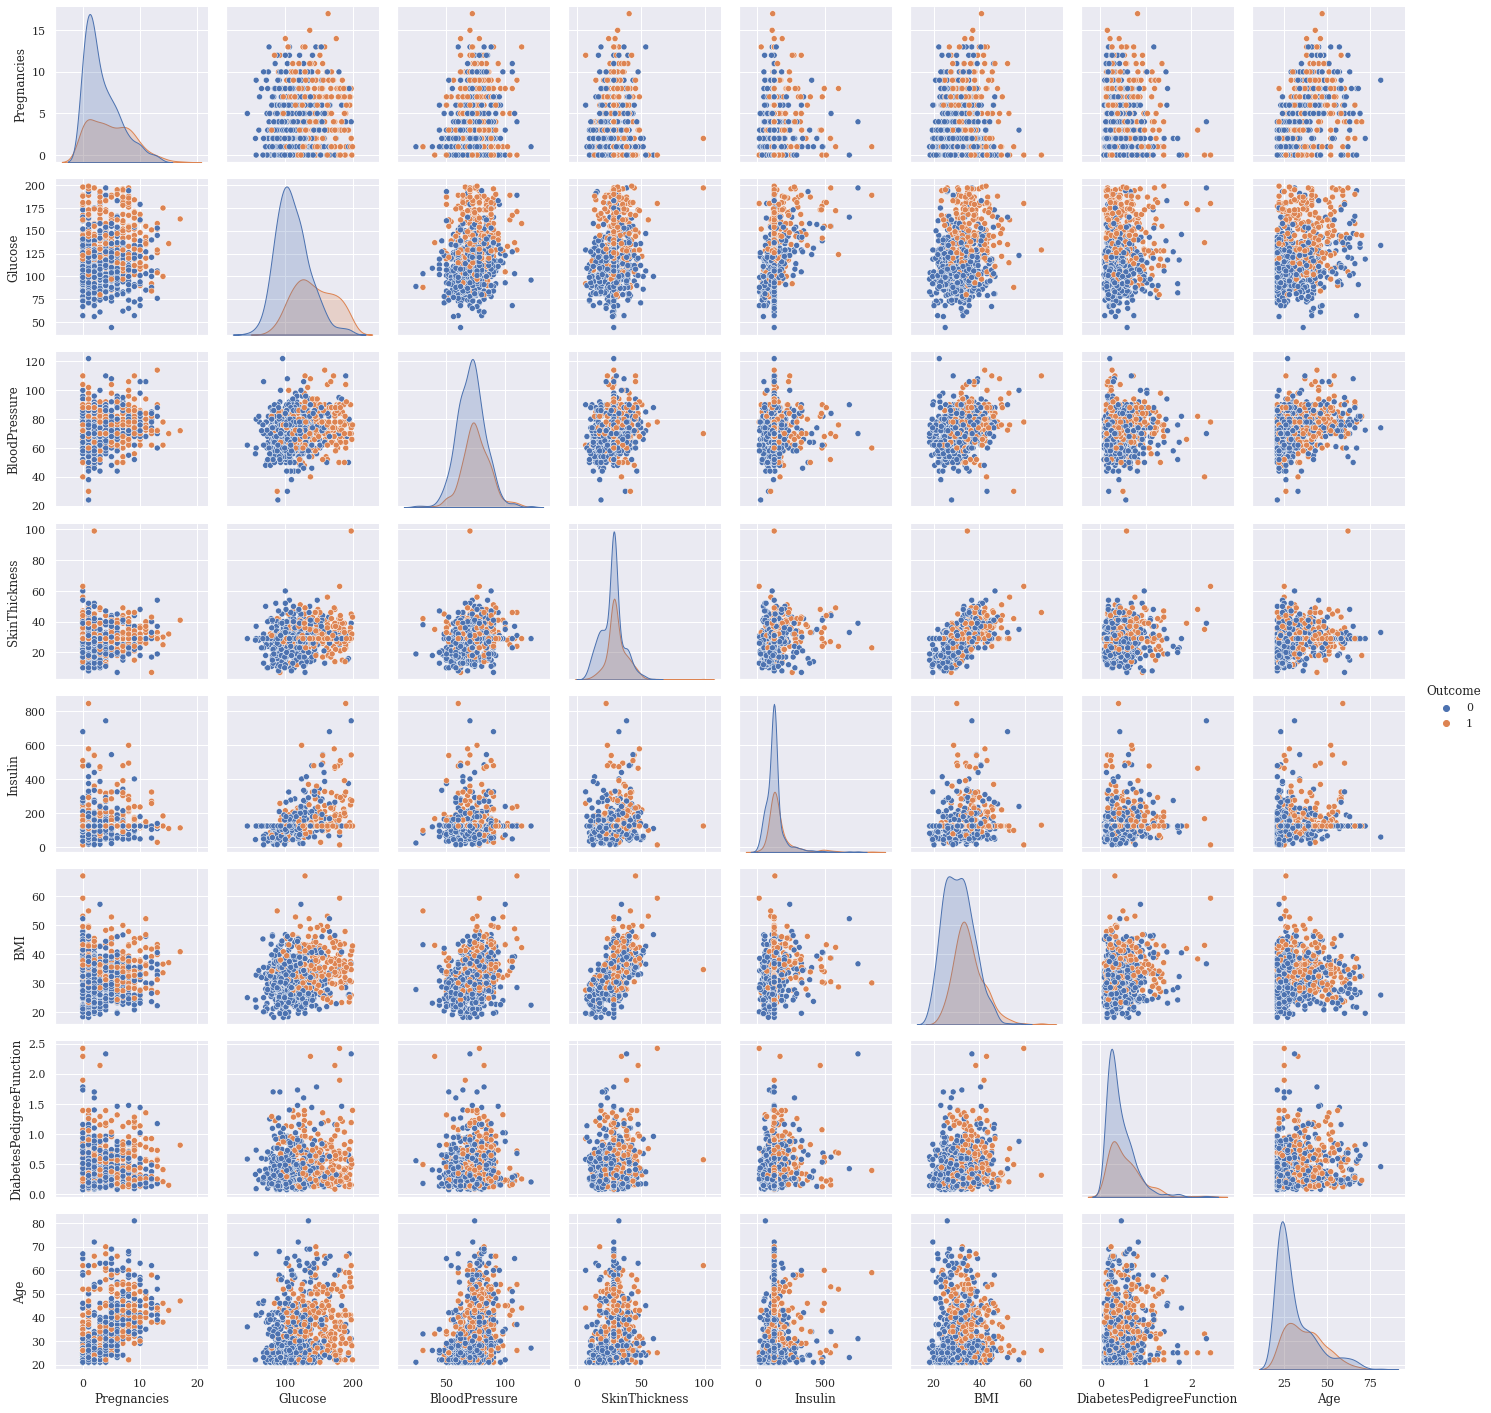

In [ ]:
# Pairplot of the clean data
p=sns.pairplot(df_cleaned, hue = 'Outcome')

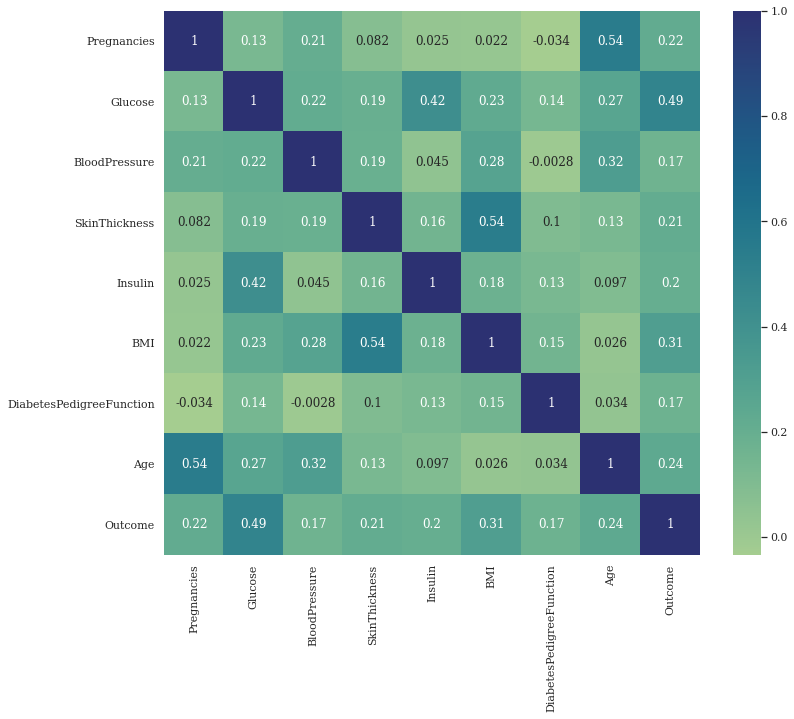

In [ ]:
# Plotting heatmap of correlation coefficient
plt.figure(figsize=(12,10))  
p=sns.heatmap(df_cleaned.corr(), annot=True,cmap ='crest') 

In [ ]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_cleaned.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = df_cleaned.values[:, 8]

# Modeling
In this section we create the 3 models including Random Forest, Support Vector Machine, and Naive Bayes. For all of the models we use a 10 fold cross validation. For this purpose first we divide the data into two part of the Training and testing with the proportion of 80% and 20% respectively.

In [ ]:
# Creating train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(max_depth=3, random_state=0)
model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# SVM Model
from sklearn import svm
model2 = svm.SVC()
model2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state = 40, shuffle=True)


# Validation and Performance Metrics
In this section performance metrics for each step of cross-validation and also test date for each model is aquired.

The performance metrics given in this function includes:
- Accuracy
- Precision
- f1
- ROC and AUC
- Jaccard
- True Positive
- False Positive
- True Negative
- False Negative
- True Positive Rate
- True Negative Rate
- False Positive Rate
- False Negative Rate
- Error Rate
- Balanced Accuracy
- True Skill Statistics
- Heidke Skill Score

In [ ]:
def model_scoring (model, name, X, y, CV):
  # This function print performance metrics of a classification of 0 and 1 output in a table
  # If metrics for each step of cross validation is of inerest 'CV' should be a model_selection.KFold object
  # If there is no cross-validation the CV should be None

  from sklearn import model_selection 
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import make_scorer

  # defining tn, fp, fn, tp metric functions
  def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
  def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
  def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
  def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
  def tpr(y_true, y_pred):
    tn = confusion_matrix(y_true, y_pred)[0, 0]
    fp = confusion_matrix(y_true, y_pred)[0, 1]
    fn = confusion_matrix(y_true, y_pred)[1, 0]
    tp = confusion_matrix(y_true, y_pred)[1, 1]
    tpr = tp / (tp + fn)
    return tpr
  def tnr(y_true, y_pred):
    tn = confusion_matrix(y_true, y_pred)[0, 0]
    fp = confusion_matrix(y_true, y_pred)[0, 1]
    fn = confusion_matrix(y_true, y_pred)[1, 0]
    tp = confusion_matrix(y_true, y_pred)[1, 1]
    tnr = tn / (tn + fp)
    return tnr
  def fpr(y_true, y_pred):
    tn = confusion_matrix(y_true, y_pred)[0, 0]
    fp = confusion_matrix(y_true, y_pred)[0, 1]
    fn = confusion_matrix(y_true, y_pred)[1, 0]
    tp = confusion_matrix(y_true, y_pred)[1, 1]
    fpr = fp / (tn + fp)
    return fpr
  def fnr(y_true, y_pred):
    tn = confusion_matrix(y_true, y_pred)[0, 0]
    fp = confusion_matrix(y_true, y_pred)[0, 1]
    fn = confusion_matrix(y_true, y_pred)[1, 0]
    tp = confusion_matrix(y_true, y_pred)[1, 1]
    fnr = fn / (tp + fp)
    return fnr
  def err(y_true, y_pred):
    tn = confusion_matrix(y_true, y_pred)[0, 0]
    fp = confusion_matrix(y_true, y_pred)[0, 1]
    fn = confusion_matrix(y_true, y_pred)[1, 0]
    tp = confusion_matrix(y_true, y_pred)[1, 1]
    err = (fp + fn) / (tp + fp + fn + tn) # Error rate 
    return err
  def bacc(y_true, y_pred):
    tn = confusion_matrix(y_true, y_pred)[0, 0]
    fp = confusion_matrix(y_true, y_pred)[0, 1]
    fn = confusion_matrix(y_true, y_pred)[1, 0]
    tp = confusion_matrix(y_true, y_pred)[1, 1]
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    bacc = (tpr + tnr) / 2 # Ballanced Accuracy
    return bacc
  def tss(y_true, y_pred):
    tn = confusion_matrix(y_true, y_pred)[0, 0]
    fp = confusion_matrix(y_true, y_pred)[0, 1]
    fn = confusion_matrix(y_true, y_pred)[1, 0]
    tp = confusion_matrix(y_true, y_pred)[1, 1]
    tss = (tp / (tp + fn)) - (fp / (fp + tn)) # True Skill Statistics
    return tss
  def hss(y_true, y_pred):
    tn = confusion_matrix(y_true, y_pred)[0, 0]
    fp = confusion_matrix(y_true, y_pred)[0, 1]
    fn = confusion_matrix(y_true, y_pred)[1, 0]
    tp = confusion_matrix(y_true, y_pred)[1, 1]
    hss = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) # Heidke Skill Statistics
    return hss

  # Scoring option as an out put for each fold of cross validation
  scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'f1': 'f1', 'recall': 'recall', 'roc_auc': 'roc_auc', 'jaccard': 'jaccard'
  ,'tp': make_scorer(tp), 'tn': make_scorer(tn), 'fp': make_scorer(fp),'fn': make_scorer(fn), 'tpr': make_scorer(tpr), 'tnr': make_scorer(tnr)
  , 'fpr': make_scorer(fpr), 'fnr': make_scorer(fnr) , 'err': make_scorer(err), 'bacc': make_scorer(bacc), 'tss': make_scorer(tss), 'hss': make_scorer(hss)}

  # Getting scores for all 
  scores = model_selection.cross_validate(model, X, y, scoring=scoring, cv=CV, return_train_score=True)


  # Creating Table for cross validation Random Forest
  if CV == None:
    print('This is performance of the '+ name +' model \n')
  else:
    print('This is performance of each cross-validation fold for '+ name +' \n')
  
  cv_header = []
  cv_header.append('Fold Num.')
  cv_header.append('accur')
  cv_header.append('prec')
  cv_header.append('f1')
  cv_header.append('recall')
  cv_header.append('roc_auc')
  cv_header.append('jaccard')
  cv_header.append('tp')
  cv_header.append('fp')
  cv_header.append('tn')
  cv_header.append('fn')
  cv_header.append('tpr')
  cv_header.append('tnr')
  cv_header.append('fpr')
  cv_header.append('fnr')
  cv_header.append('err')
  cv_header.append('bacc')
  cv_header.append('tss')
  cv_header.append('hss')
  cv_table = []

  if CV == None:
    limit = 0
  else:
    limit = CV.n_splits

  for i in range(0, limit, 1):
    temp = []
    temp.append('fold' + str(i + 1))
    temp.append(round(scores['test_accuracy'][i], 2))
    temp.append(round(scores['test_precision'][i], 2))
    temp.append(round(scores['test_f1'][i], 2))
    temp.append(round(scores['test_recall'][i], 2))
    temp.append(round(scores['test_roc_auc'][i], 2))
    temp.append(round(scores['test_jaccard'][i], 2))
    temp.append(round(scores['test_tp'][i], 2))
    temp.append(round(scores['test_fp'][i], 2))
    temp.append(round(scores['test_tn'][i], 2))
    temp.append(round(scores['test_fn'][i], 2))
    temp.append(round(scores['test_tpr'][i], 2))
    temp.append(round(scores['test_tnr'][i], 2))
    temp.append(round(scores['test_fpr'][i], 2))
    temp.append(round(scores['test_fnr'][i], 2))
    temp.append(round(scores['test_err'][i], 2))
    temp.append(round(scores['test_bacc'][i], 2))
    temp.append(round(scores['test_tss'][i], 2))
    temp.append(round(scores['test_hss'][i], 2))

    cv_table.append(temp)
  
  if CV == None:
    last_row = 'Test data'
  else:
    last_row = 'mean'
  temp = []
  temp.append(last_row)
  temp.append(round(scores['test_accuracy'].mean(), 2))
  temp.append(round(scores['test_precision'].mean(), 2))
  temp.append(round(scores['test_f1'].mean(), 2))
  temp.append(round(scores['test_recall'].mean(), 2))
  temp.append(round(scores['test_roc_auc'].mean(), 2))
  temp.append(round(scores['test_jaccard'].mean(), 2))
  temp.append(round(scores['test_tp'].mean(), 2))
  temp.append(round(scores['test_fp'].mean(), 2))
  temp.append(round(scores['test_tn'].mean(), 2))
  temp.append(round(scores['test_fn'].mean(), 2))
  temp.append(round(scores['test_tpr'].mean(), 2))
  temp.append(round(scores['test_tnr'].mean(), 2))
  temp.append(round(scores['test_fpr'].mean(), 2))
  temp.append(round(scores['test_fnr'].mean(), 2))
  temp.append(round(scores['test_err'].mean(), 2))
  temp.append(round(scores['test_bacc'].mean(), 2))
  temp.append(round(scores['test_tss'].mean(), 2))
  temp.append(round(scores['test_hss'].mean(), 2))
  cv_table.append(temp)

  print(tabulate(cv_table, cv_header, tablefmt="github"))
  print('\n')  

In [ ]:
model_scoring(model1, 'Random Forest',X_train, y_train, kfold)
model_scoring(model2, 'SVM',X_train, y_train, kfold)
model_scoring(model3, 'Naive Bayes',X_train, y_train, kfold)

This is performance of each cross-validation fold for Random Forest 

| Fold Num.   |   accur |   prec |   f1 |   recall |   roc_auc |   jaccard |   tp |   fp |   tn |   fn |   tpr |   tnr |   fpr |   fnr |   err |   bacc |   tss |   hss |
|-------------|---------|--------|------|----------|-----------|-----------|------|------|------|------|-------|-------|-------|-------|-------|--------|-------|-------|
| fold1       |    0.74 |   0.76 | 0.62 |     0.52 |      0.81 |      0.45 | 13   |  4   | 33   | 12   |  0.52 |  0.89 |  0.11 |  0.71 |  0.26 |   0.71 |  0.41 |  0.43 |
| fold2       |    0.71 |   0.62 | 0.47 |     0.38 |      0.8  |      0.31 |  8   |  5   | 36   | 13   |  0.38 |  0.88 |  0.12 |  1    |  0.29 |   0.63 |  0.26 |  0.29 |
| fold3       |    0.77 |   0.87 | 0.65 |     0.52 |      0.83 |      0.48 | 13   |  2   | 35   | 12   |  0.52 |  0.95 |  0.05 |  0.8  |  0.23 |   0.73 |  0.47 |  0.5  |
| fold4       |    0.68 |   0.47 | 0.44 |     0.42 |      0.75 |      0.29 |  8 

In [ ]:
model_scoring(model1, 'Random Forest',X_test, y_test, None)
model_scoring(model2, 'SVM',X_test, y_test, None)
model_scoring(model3, 'Naive Bayes',X_test, y_test, None)

This is performance of the Random Forest model 

| Fold Num.   |   accur |   prec |   f1 |   recall |   roc_auc |   jaccard |   tp |   fp |   tn |   fn |   tpr |   tnr |   fpr |   fnr |   err |   bacc |   tss |   hss |
|-------------|---------|--------|------|----------|-----------|-----------|------|------|------|------|-------|-------|-------|-------|-------|--------|-------|-------|
| Test data   |    0.79 |   0.79 | 0.54 |     0.45 |      0.85 |      0.39 |  4.2 |  1.2 | 20.2 |  5.2 |  0.45 |  0.94 |  0.06 |  1.58 |  0.21 |    0.7 |  0.39 |  0.43 |


This is performance of the SVM model 

| Fold Num.   |   accur |   prec |   f1 |   recall |   roc_auc |   jaccard |   tp |   fp |   tn |   fn |   tpr |   tnr |   fpr |   fnr |   err |   bacc |   tss |   hss |
|-------------|---------|--------|------|----------|-----------|-----------|------|------|------|------|-------|-------|-------|-------|-------|--------|-------|-------|
| Test data   |     0.8 |    0.7 | 0.65 |     0.62 |      0.

Handling Imbalanced Data

we are going to balance the train dataset without creating any synthetic data in testing dataset



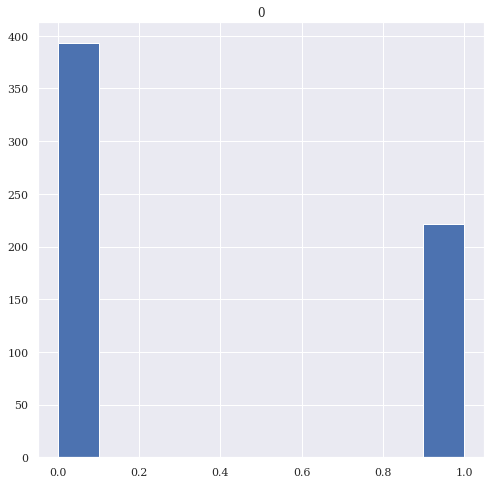

In [ ]:
temp = pd.DataFrame(y_train)
fig = temp.hist(figsize=(8,8))

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


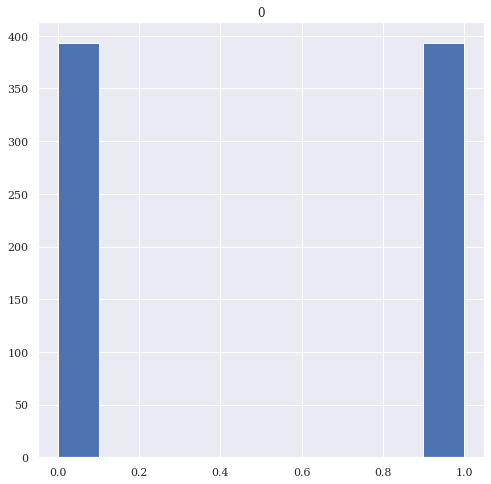

In [ ]:
temp = pd.DataFrame(y_train_bal)
fig = temp.hist(figsize=(8,8))

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=3, random_state=0)
model4.fit(X_train_bal, y_train_bal)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# SVM Model
from sklearn import svm
model5 = svm.SVC()
model5.fit(X_train_bal, y_train_bal)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(X_train_bal, y_train_bal)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
model_scoring(model4, 'Random Forest',X_train_bal, y_train_bal, kfold)
model_scoring(model5, 'SVM',X_train_bal, y_train_bal, kfold)
model_scoring(model6, 'Naive Bayes',X_train_bal, y_train_bal, kfold)

This is performance of each cross-validation fold for Random Forest 

| Fold Num.   |   accur |   prec |   f1 |   recall |   roc_auc |   jaccard |   tp |   fp |   tn |   fn |   tpr |   tnr |   fpr |   fnr |   err |   bacc |   tss |   hss |
|-------------|---------|--------|------|----------|-----------|-----------|------|------|------|------|-------|-------|-------|-------|-------|--------|-------|-------|
| fold1       |    0.8  |   0.67 | 0.78 |     0.94 |      0.88 |      0.64 | 29   | 14   | 34   |    2 |  0.94 |  0.71 |  0.29 |  0.05 |  0.2  |   0.82 |  0.64 |  0.6  |
| fold2       |    0.77 |   0.76 | 0.79 |     0.83 |      0.88 |      0.65 | 34   | 11   | 27   |    7 |  0.83 |  0.71 |  0.29 |  0.16 |  0.23 |   0.77 |  0.54 |  0.54 |
| fold3       |    0.77 |   0.74 | 0.79 |     0.85 |      0.81 |      0.65 | 34   | 12   | 27   |    6 |  0.85 |  0.69 |  0.31 |  0.13 |  0.23 |   0.77 |  0.54 |  0.54 |
| fold4       |    0.76 |   0.74 | 0.78 |     0.83 |      0.85 |      0.64 | 34 

In [ ]:
model_scoring(model4, 'Random Forest',X_test, y_test, None)
model_scoring(model5, 'SVM',X_test, y_test, None)
model_scoring(model6, 'Naive Bayes',X_test, y_test, None)

This is performance of the Random Forest model 

| Fold Num.   |   accur |   prec |   f1 |   recall |   roc_auc |   jaccard |   tp |   fp |   tn |   fn |   tpr |   tnr |   fpr |   fnr |   err |   bacc |   tss |   hss |
|-------------|---------|--------|------|----------|-----------|-----------|------|------|------|------|-------|-------|-------|-------|-------|--------|-------|-------|
| Test data   |    0.79 |   0.79 | 0.54 |     0.45 |      0.85 |      0.39 |  4.2 |  1.2 | 20.2 |  5.2 |  0.45 |  0.94 |  0.06 |  1.58 |  0.21 |    0.7 |  0.39 |  0.43 |


This is performance of the SVM model 

| Fold Num.   |   accur |   prec |   f1 |   recall |   roc_auc |   jaccard |   tp |   fp |   tn |   fn |   tpr |   tnr |   fpr |   fnr |   err |   bacc |   tss |   hss |
|-------------|---------|--------|------|----------|-----------|-----------|------|------|------|------|-------|-------|-------|-------|-------|--------|-------|-------|
| Test data   |     0.8 |    0.7 | 0.65 |     0.62 |      0.